<a href="https://colab.research.google.com/github/cinth90/Datascience1/blob/main/ProyectoDS_ParteI_Debenedetto_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - Visualizaciones en Python
*Primera Entrega*

**Abstract**

Este proyecto utiliza el dataset “Hotel bookings” proveniente de Kaggle, que contiene más de 119.000 reservas de hoteles realizadas durante 2015 y 2017. La base de datos incluye datos de un resort y un city hotel, con información sobre país de origen del huesped, fecha de llegada, duración de la estadia, tipo de cuarto, precio promedio por noche, si viajan menores o bebes y requerimientos del huesped entre otros datos no relevantes para este analisis.

El objetivo del proyecto es explorar de donde provienen la mayoria de los huesped y si se observa alguna estacionalidad de las reservas a lo largo del anio. Para lo que se responderas preguntas de interés para el analisis de este dataset. Para ello se aplican técnicas de análisis de datos, utilizando herramientas como Matplotlib, Seaborn y pandas.

Se comienza con una limpieza básica y detección de valores faltantes, seguida de visualizaciones que permiten responder preguntas clave. Este análisis exploratorio permitirá sentar las bases para futuros trabajos de predicción, segmentación o recomendaciones de estrategias de marketing.


# Preguntas para el analisis


1.  De que 6 pais provienen la mayoria de los huspedes?
2.  Cual es el mes con mayor cantidad de reservas?
3.  Cual es la semana del anio con mayor cantidad de cancelaciones?
4.  Cuanto es el precio promedio por noche de cada tipo de cuarto?
5.  Cuanto varia la ocupacion durante los fines de semana y durante la semana a lo largo del anio?
6.  Cual es la duracion promedio de la estadia en cada tipo de hotel?
7.  Cual es el pais con mas reservas canceladas?



#Nombre de columnas: traduccion y descripcion

Hotel: Tipo de hotel: "City Hotel" o "Resort Hotel."

is_canceled: cancelada: Valor binario donde el 1 indica que fue cancelada y 0 no.

lead_time: reserva_anticipacion_dias: Numero de dias entre la reserva y la llegada al hotel.

arrival_date_year:llegada_anio: Anio de la fecha de llegada al hotel.

arrival_date_month:llegada_mes: Mes de la fecha de llegada al hotel.

arrival_date_week_number: llegada_semana: Numero de semana de la fecha de la llegada.

arrival_date_day_of_month: llegada_dia_del_mes: Dia de la fecha de llegada al hotel.

stays_in_weekend_nights: estadia_fines_de_semana_noches: Numero de noches de fin de semana (Sabado o Domingo) que el huesped se alojo durante su estadia.

stays_in_week_nights: estadia_lun_a_vie_noches: Numero de noches de semana (Lunes a Viernes) que el huesped se alojo durante su estadia.

adults: adultos:Cantidad de adultos.

children: menores: Cantidad de menores.

babies: bebes Cantidad de bebes.

meal: comida: Tipo de comida reservada.

country: huesped_pais: Pais de origen del huesped.

market_segment: segmento_de_mercado: segmento de mercado.

distribution_channel: reserva_canal: Canal de distribucion de la reserva.

is_repeated_guest:huesped_repetido: Valor binario que indica si no es la primer reserva del huesped (1) si repite o (0) si es la primer reserva.

previous_cancellations: reserva_previa_cancelada: Numero de reservas previas canceladas.

previous_bookings_not_canceled: reserva_previa_usada :Numero de reservas previas no canceladas.

reserved_room_type: cuarto_tipo_reserva Codigo del tipo de cuarto reservado.

assigned_room_type: cuarto_tipo_asignado Codigo del tipo de cuarto asignado durante el check-in.

booking_changes: reserva_cambios Number of changes/amendments made to the booking.

deposit_type: deposito_tipo: Tipo de desposito hecho.

agent: agente: Id del agente de viajes.

company:compania_id: ID de la compania.

days_in_waiting_list:dias_en_lista_espera: Numero de dias en lista de espera antes de reservar.

customer_type: reserva_tipo: tipo de reserva.

adr:precio_promedio_noche: Promedio del precio por noche.

required_car_parking_spaces:estacionamiento: Numero de estacionamientos requerido en la reserva.

total_of_special_requests:requerimientos_especiales Numero de requerimientos especiales hechos en la reserva.

reservation_status:reserva_estado: Ultimo estado de la reserva (check-out, canceled, Noshow).

reservation_status_date:reserva_ultima_actulizacion: Fecha de la ultima actualizacion del estado de la reserva.

**Datos descartados**
Estos datos fueron descartados antes de comenzar el analisis por no ser relavantes para el estudio.

name: huesped_nombre: Nombre del huesped.

email:huesped_mail: Mail del huesped.

phone-number:huesped_tel: Telefono del huesped

credit_card:huesped_tarjeta_credito: Numero de la tarjeta de credito del huesped.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Carga de los dato
df = pd.read_csv('https://raw.githubusercontent.com/cinth90/hotel_reservas/refs/heads/main/hotel_bookings.csv')
df.head()

,hotel,cancelada,reserva_anticipacion_dias,llegada_anio,llegada_mes,llegada_semana,llegada_dia,estadia_fines_de_semana_noches,estadia_lun_a_vie_noches,adultos,...,deposito_tipo,agente,compania,dias_en_lista_espera,reserva_tipo,precio_promedio_noche,estacionamiento,requerimientos_especiales,reserva_estado,reserva_ultima_actulizacion
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/07/2015


In [49]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
cancelada,119390.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
reserva_anticipacion_dias,119390.0,104.0,107.0,0.0,18.0,69.0,160.0,737.0
llegada_anio,119390.0,2016.0,1.0,2015.0,2016.0,2016.0,2017.0,2017.0
llegada_semana,119390.0,27.0,14.0,1.0,16.0,28.0,38.0,53.0
llegada_dia,119390.0,16.0,9.0,1.0,8.0,16.0,23.0,31.0
estadia_fines_de_semana_noches,119390.0,1.0,1.0,0.0,0.0,1.0,2.0,19.0
estadia_lun_a_vie_noches,119390.0,3.0,2.0,0.0,1.0,2.0,3.0,50.0
adultos,119390.0,2.0,1.0,0.0,2.0,2.0,2.0,55.0
menores,119386.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
bebes,119390.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


# Analisis de datos nulos

In [83]:
df['precio_promedio_noche'] = df['precio_promedio_noche'].replace(0, np.nan) #reemplace precio en cero por datos vacios
print("Porcentaje de datos nulos %")
datos_nulos =(df.isna().mean()*100).round(2).sort_values(ascending=False)
datos_nulos[datos_nulos > 0]


Porcentaje de datos nulos %


,0
compania,94.31
agente,13.69
precio_promedio_noche,1.64
huesped_pais,0.41


# Tratamiento de datos nulos:

*   **compania y agente:** No van a ser tenidos en cuenta para el analisis. Por lo tanto NO se imputaran los valores faltantes.
*   **huesped_pais**: Este dato es del tipo cualitativo (nombre de un pais) y tiene una baja cantidad de datos faltantes. Este dato es necesario para llevar a cabo este estudio por lo que se decidio realizar una imputacion por vecinos cercanos (knn).


*   **precio_promedio_noche	 y menores** : Los datos nulos son minimos. Es del tipo cuantitativa por lo que se realiza una imputacion simple por la mediana.




In [76]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer # librería diseñada para rellenar datos faltantes.
from sklearn.preprocessing import LabelEncoder #sirve para codificar datos categoricos a numeros para usar knn


# Copia del dataframe para no modificar el original
df_imputed = df.copy()


#Aplicando SimpleImputer
imputer_simple = SimpleImputer(strategy='median') #rellenar nan con estrategia median-->mediana
df_imputed[['menores','precio_promedio_noche']] = imputer_simple.fit_transform(df_imputed[['menores', 'precio_promedio_noche']])
#.fit(): El imputador aprende la mediana de la columna especificada, ignorando los valores nulos.
#.transform(): El imputador aplica esa mediana para reemplazar los valores nulos en la columna.


#Aplicando KNN a un dato categorico
from sklearn.preprocessing import LabelEncoder #sirve para codificar datos categoricos a numeros para usar knn

# Paso 1: Codificar la columna
encoder = LabelEncoder()
df_imputed['huesped_pais'] = df_imputed['huesped_pais'].astype(str)
df_imputed['huesped_pais'] = encoder.fit_transform(df_imputed['huesped_pais'])

# Paso 2: Imputar con KNN
imputer_knn = KNNImputer(n_neighbors=5)
df_imputed[['huesped_pais']] = imputer_knn.fit_transform(df_imputed[['huesped_pais']])

# Paso 3: Decodificar de vuelta
df_imputed['huesped_pais'] = df_imputed['huesped_pais'].round().astype(int)
df_imputed['huesped_pais'] = encoder.inverse_transform(df_imputed['huesped_pais'])

In [54]:
datos_nulos = df_imputed.isna().sum().sort_values(ascending=False)
datos_nulos[datos_nulos > 0]


,0
compania,112593
agente,16340


#De que 6 pais vienen la mayoria de los huspedes?

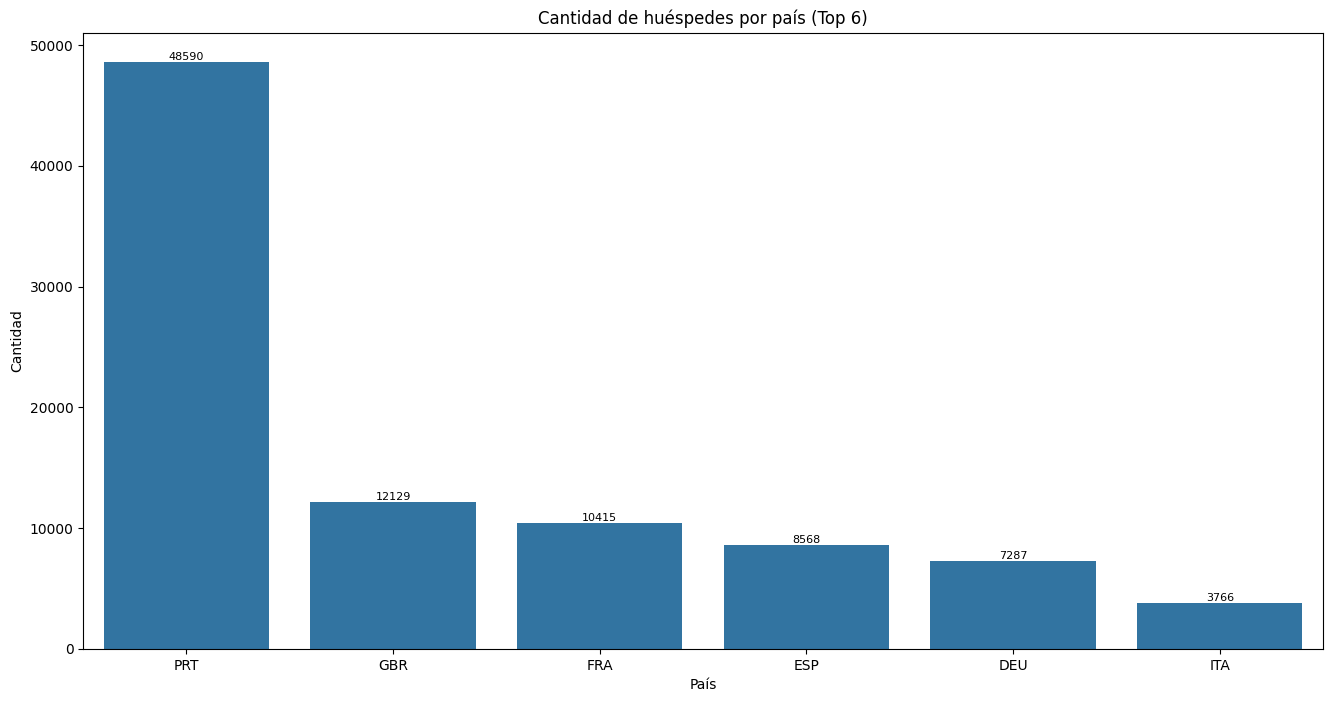

In [72]:
top_6_paises = df_imputed['huesped_pais'].value_counts().nlargest(6).index #cuento y me quedo con los 6 mas grandes
df_top6 = df_imputed[df_imputed['huesped_pais'].isin(top_6_paises)] #filtro mi dataset y creo el df_top6

plt.figure(figsize=(16,8))
ax = sns.countplot(x='huesped_pais', data=df_top6, order=top_6_paises)
plt.title('Cantidad de huéspedes por país (Top 6)')
plt.xlabel('País')
plt.ylabel('Cantidad')
# Agregar etiquetas arriba de cada barra
for p in ax.patches: #es la lista de barras dibujadas
    ax.annotate(f'{int(p.get_height())}',  #p.get_height() → da el valor (cantidad de huéspedes) ax.annotate() → escribe el número justo arriba de la barra.
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)
plt.show()


Portugal (PRT) es, por amplio margen, el país con más huéspedes (48.590), superando casi 4 veces al segundo lugar (Reino Unido, GBR).

Reino Unido (GBR) y Francia (FRA) están en segundo y tercer lugar con cifras relativamente cercanas (12.129 y 10.415 respectivamente).

España (ESP), Alemania (DEU) e Italia (ITA) muestran cantidades menores, con Italia como el país con menos huéspedes (3.766).

La distribución es muy desigual: Portugal representa la gran mayoría de las reservas dentro del top 6.

# De los 6 paises con mas reservas, cuantas cancelaciones y no shows tiene cada uno?


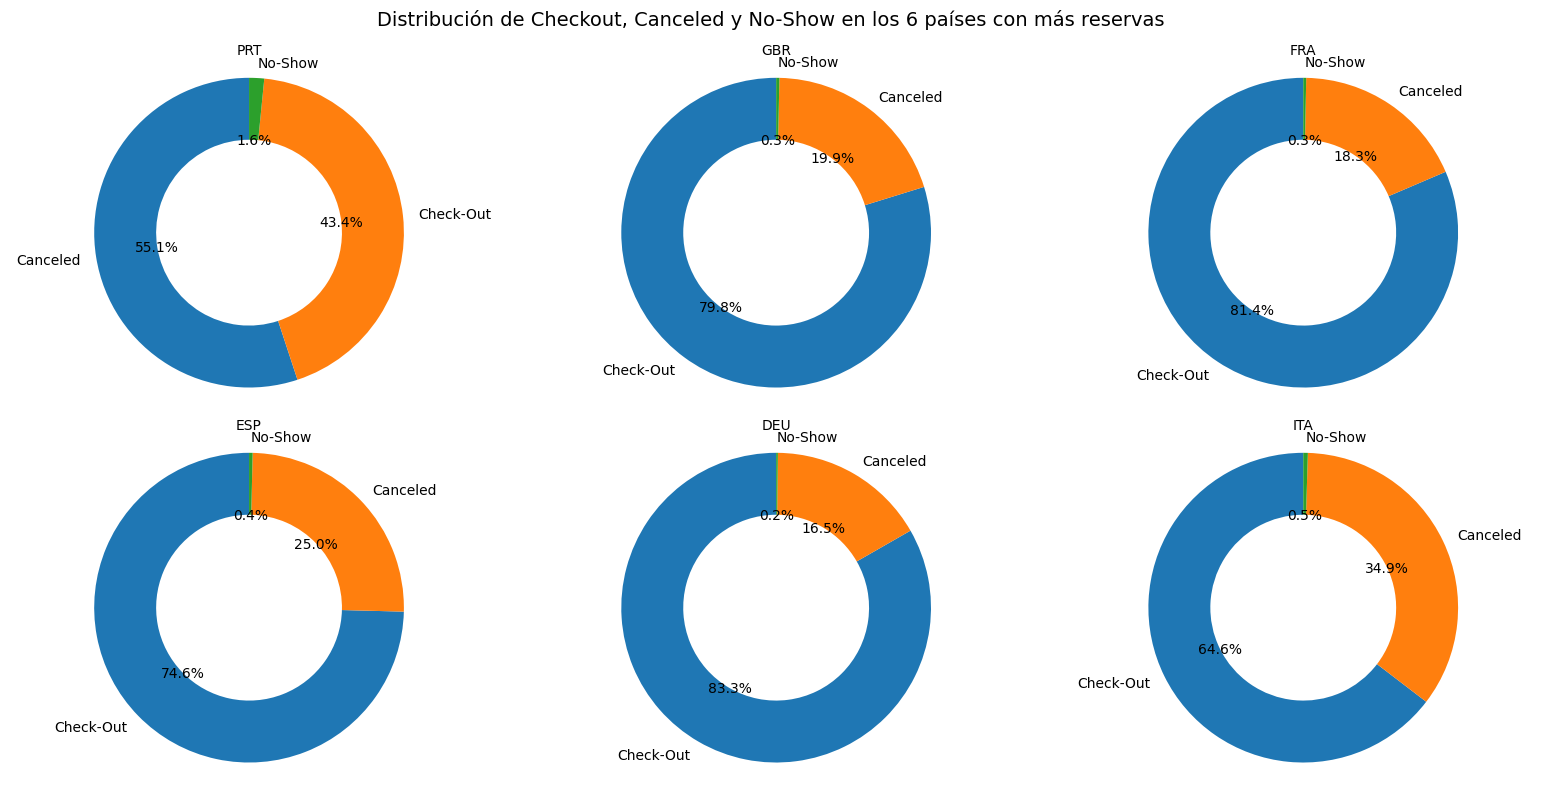

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))  # 2 filas x 3 columnas

# Flatten axes para iterar más fácil
axes = axes.flatten()

for ax, country in zip(axes, top_6_paises):
    df_country = df_top6[df_top6['huesped_pais'] == country]  # filtro datos de cada país
    estado_counts = df_country['reserva_estado'].value_counts()  # cuento los estados

    wedges, texts, autotexts = ax.pie(
        estado_counts,
        labels=estado_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.4)
    )

    ax.set_title(country, fontsize=10)
    ax.axis('equal')  # para que sea circular

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle("Distribución de Checkout, Canceled y No-Show en los 6 países con más reservas", fontsize=14)
plt.tight_layout()
plt.show()

Portugal (PRT) es un caso atípico: más del 55% de sus reservas terminan en cancelación, mientras que el resto de los países tienen mayoría de check-outs.

Reino Unido (GBR), Francia (FRA) y Alemania (DEU) presentan una altísima proporción de check-outs (≈80% o más), lo que indica que la mayoría de sus reservas se concretan.

España (ESP) tiene un 25% de cancelaciones, más alto que la media, pero mucho menor que Portugal.

Italia (ITA) es el segundo país con mayor proporción de cancelaciones (≈35%), aunque tiene menos reservas totales.

No-Show es muy bajo en todos los países (<1%), por lo que no parece un problema relevante.

In [77]:
estado_recuento = df_top6['reserva_estado'].value_counts()
print(estado_recuento)

reserva_estado
Check-Out    54121
Canceled     35735
No-Show        899
Name: count, dtype: int64


#Sugerencias
Portugal es el país más relevante en volumen, pero su alta tasa de cancelaciones podría estar afectando indicadores de ocupación y requiere atención como analista de datos sugeriria una revision de la politica de cancelaciones para el mercado de Portugal.

El resto de los países tienen buen nivel de concreción (altas tasas de check-out), lo que sugiere huéspedes más confiables.

No-Show no es un problema significativo en ninguno de los países, ya que representa un porcentaje marginal.

#Cual es el mes con mayor cantidad de reservas?

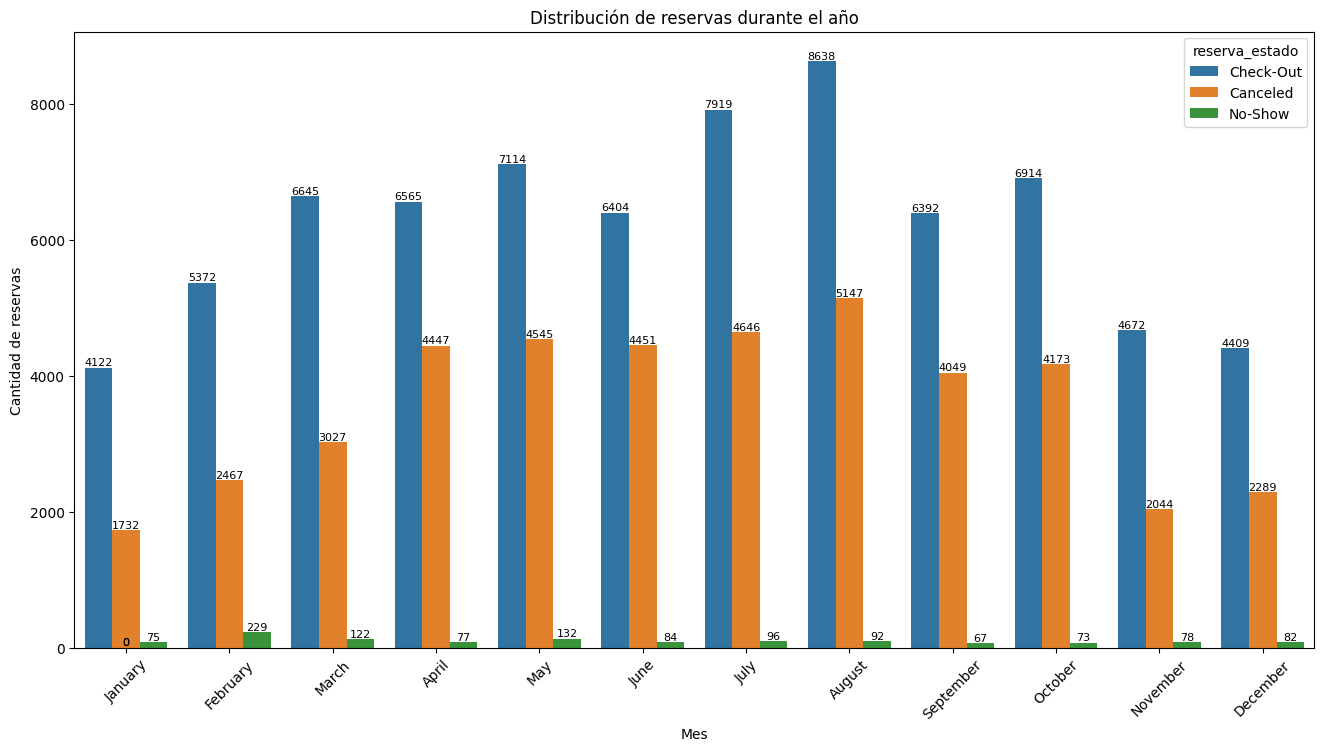

In [61]:
#Ordenando los meses
df_imputed['llegada_mes'] = pd.Categorical(
    df_imputed['llegada_mes'],
    categories=[ #Reconvertir a categórica con orden correcto
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ],
    ordered=True
)

#Grafico usando countplot
plt.figure(figsize=(16,8))
ax = sns.countplot(
    x='llegada_mes',
    data=df_imputed,
    order=df_imputed['llegada_mes'].cat.categories, # ahora sí existe .cat.categories
   hue='reserva_estado'
)
plt.title('Distribución de reservas durante el año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de reservas')
plt.xticks(rotation=45)

#números sobre barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=8)

plt.show()


Julio y Agosto son los meses de mayor demanda, con picos superiores a 7.900 y 8.600 check-outs respectivamente.

Las cancelaciones siguen un patrón similar, aumentando en temporada alta, pero sin superar las reservas efectivas.

No-Show es bajo durante todo el año (<3% en cualquier mes), por lo que no es un problema crítico.

#En que semana del anio hay mas reservas con ninios?

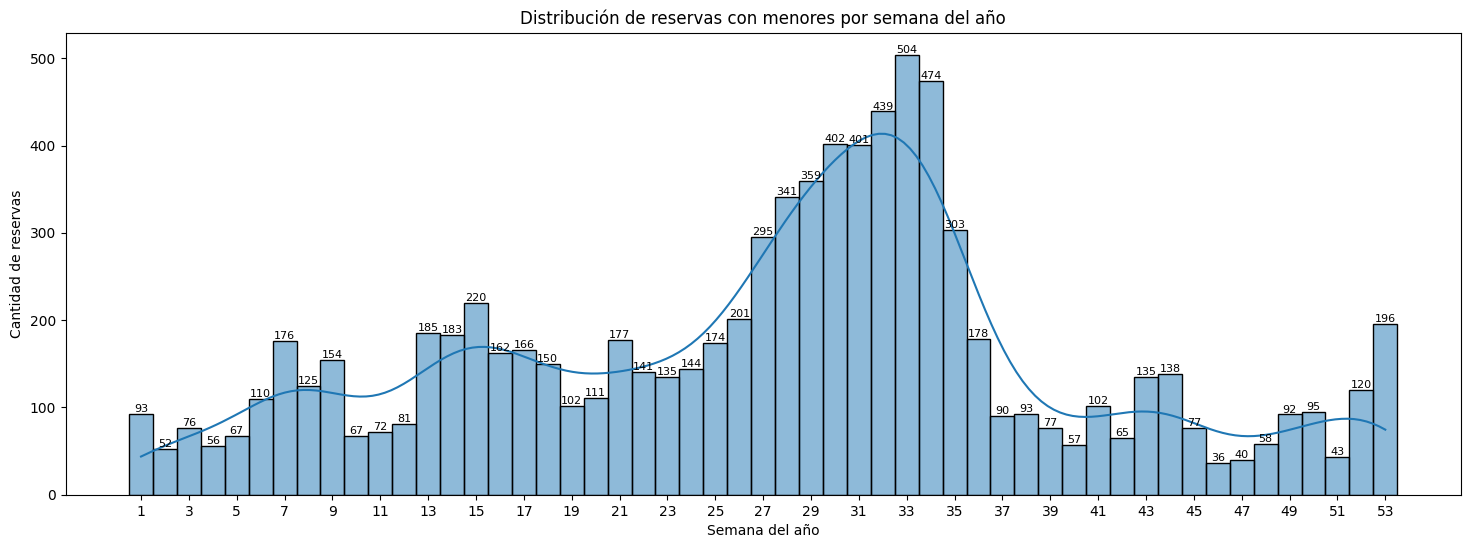

In [78]:
# Filtro reservas con menores
df_menores = df_imputed[df_imputed['menores'] > 0]

plt.figure(figsize=(18,6))
ax = sns.histplot(df_menores['llegada_semana'], bins=30, discrete=True, kde=True)# discrete=True: una barra por semana

plt.title('Distribución de reservas con menores por semana del año')
plt.xlabel('Semana del año')
plt.ylabel('Cantidad de reservas')

# Mostrar eje X de 2 en 2
xticks = range(int(df_menores['llegada_semana'].min()),
               int(df_menores['llegada_semana'].max())+1,2)
ax.set_xticks(xticks)

# Agregar etiqueta a cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # solo anotar si hay datos
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)

plt.show()


Hay una clara concentración de reservas familiares entre las semanas 27 y 35 (julio y agosto), coincidiendo con vacaciones escolares en muchos países europeos.

Después de la semana 35, las reservas con menores caen de manera abrupta, marcando el fin de la temporada alta.

Se observa un pequeño repunte en la semana 52, posiblemente asociado a vacaciones de Navidad y fin de año.

#Sugerencias estrategicas

**Optimizar tarifas en temporada alta**

Aplicar tarifas dinamicas en julio y agosto para maximizar el ingreso por habitación.

Considerar mínimo de noches en reservas durante semanas de mayor ocupación para mejorar el promedio de precio por noche.

**Mejorar la gestión de cancelaciones**

Implementar tarifas no reembolsables o con penalidad progresiva en los meses de mayor demanda (abril-agosto).

Ofrecer beneficios por reserva anticipada para reducir cancelaciones de último momento.

**Potenciar la oferta para familias**

Diseñar paquetes familiares (hospedaje + actividades + alimentación) en semanas 27–35.

Comunicar estos paquetes con antelación (campañas en Q1/Q2) para captar el público que planifica vacaciones.

**Desestacionalizar la demanda**

Lanzar promociones especiales en temporada baja (enero, noviembre, diciembre pre-fiestas) para mantener ocupación estable.

Promover eventos corporativos, retiros o escapadas románticas en los meses de menor ocupación.

#Cuanto es el precio promedio por noche de cada tipo de cuarto?

  cuarto_tipo_reserva  precio_promedio_noche
0                   A              92.365372
1                   B              93.164562
2                   C             162.153487
3                   D             121.652623
4                   E             126.168335
5                   F             170.083507
6                   G             179.988386
7                   H             189.171531
8                   L             124.666667
9                   P              95.000000


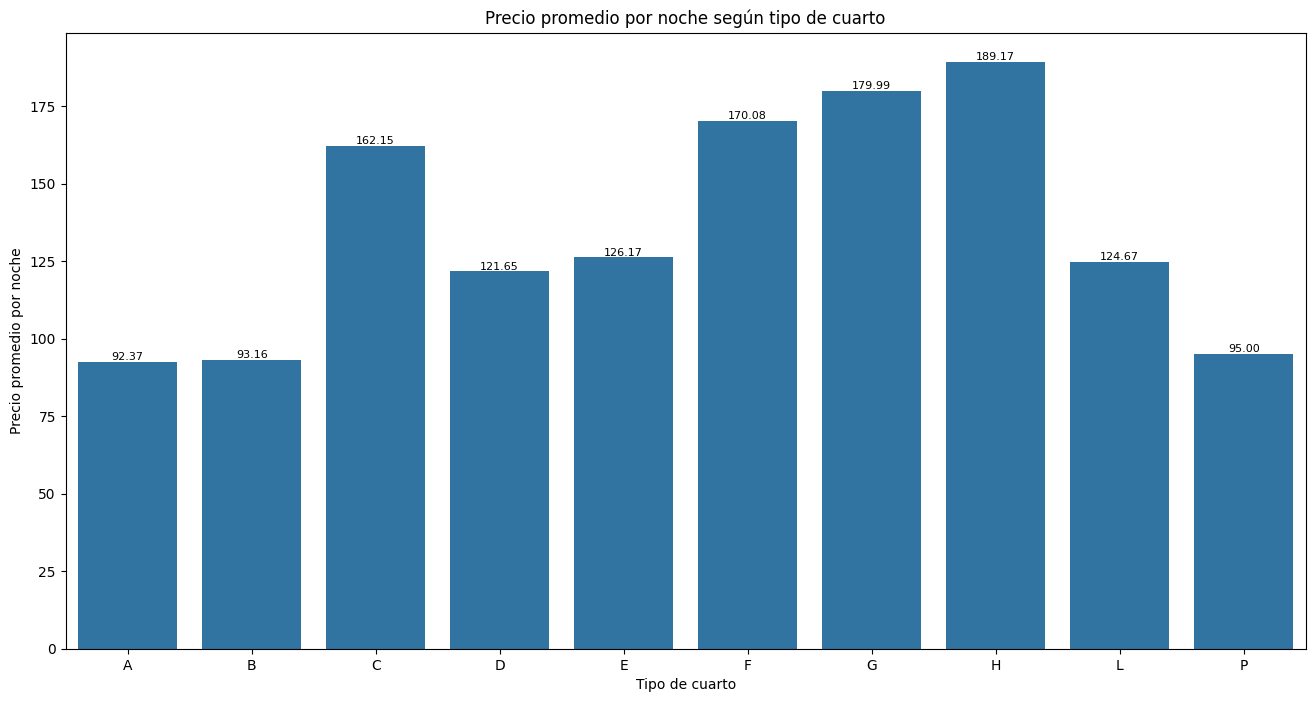

In [65]:
# Calcular promedio y convertir en DataFrame
df_imputed = pd.DataFrame(df_imputed)
df_promedios = df_imputed.groupby('cuarto_tipo_reserva')['precio_promedio_noche'].mean().reset_index()

print(df_promedios)

plt.figure(figsize=(16,8))
ax = sns.barplot(
    data=df_promedios,
    x='cuarto_tipo_reserva',           # eje X: tipo de cuarto
    y='precio_promedio_noche'          # eje Y: promedio
)

plt.title('Precio promedio por noche según tipo de cuarto')
plt.ylabel('Precio promedio por noche')
plt.xlabel('Tipo de cuarto')

#números sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # mostrar con 2 decimales
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

plt.show()

#Analisis de correlacion entre las variables:


*   Cancelacion
*   Anticipacion de la reserva
*  Requerimientos especiales



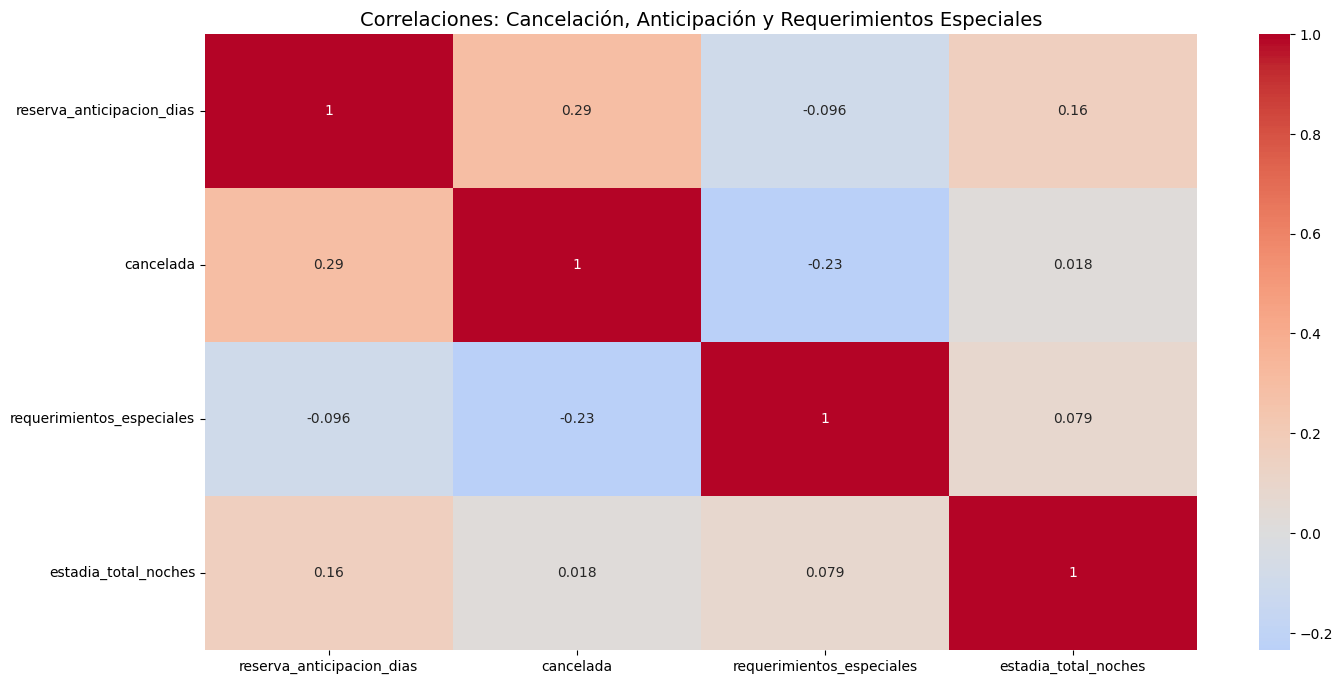

In [46]:
# Estadía total = estadia de lun a viernes + estadia en fines de semana
df_imputed['estadia_total_noches'] = (
    df_imputed['estadia_fines_de_semana_noches'] + df_imputed['estadia_lun_a_vie_noches']
)

# Seleccionar solo las columnas de interés
cols_interes = ['reserva_anticipacion_dias', 'cancelada',
                'requerimientos_especiales', 'estadia_total_noches']

df_corr = df_imputed[cols_interes].corr()

# Graficar heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, annot=True,  cmap= 'coolwarm' , center=0)
plt.title('Correlaciones: Cancelación, Anticipación y Requerimientos Especiales', fontsize=14)
plt.show()


#Hipotesis:

1.  Si reservas con más días de anticipación tenes mayor probabilidad de cancelar.

* Correlación reserva_anticipacion_dias vs cancelada: 0.29 → correlación positiva moderada. Significa que a mayor cantidad de días de anticipación, mayor probabilidad de que la reserva sea cancelada.Esto es coherente con la lógica de negocio: quien reserva muy anticipadamente tiene más tiempo para cambiar de planes.

2.  Requerimientos especiales no están fuertemente ligados a estadías más largas

* Correlación requerimientos_especiales vs estadia_total_noches: 0.079 → casi nula. Esto sugiere que pedir más requerimientos especiales no implica necesariamente quedarse más noches.

3.  Relación entre cancelación y requerimientos especiales es negativa

*   Correlación requerimientos_especiales vs cancelada: -0.23 → negativa moderada. Los huéspedes con más requerimientos tienden a cancelar menos. Tiene sentido: si alguien solicita servicios específicos (ej. cama extra, accesibilidad), es probable que realmente necesite la estadía.

4.  Pequeña relación entre estadía total y anticipación

* Correlación reserva_anticipacion_dias vs estadia_total_noches: 0.16 → relación débil pero positiva. Quien se queda más noches tiende a reservar con algo más de anticipación.

#Conclusión general:

* Hay evidencia de que reservas más anticipadas se cancelan más.

* No hay evidencia significativa de que tener más requerimientos especiales se relacione con estadías más largas.

* Más requerimientos parece reducir la probabilidad de cancelación.

#Deteccion de outliers

In [43]:
def generar_hist(df:pd.DataFrame) -> None:
    fig = plt.figure(figsize=(16,9))
    df.hist(bins=10, figsize=(16,9), layout=(3,7),alpha=0.7, edgecolor='black')
    plt.suptitle('Graficos de distribucion', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

<Figure size 1600x900 with 0 Axes>

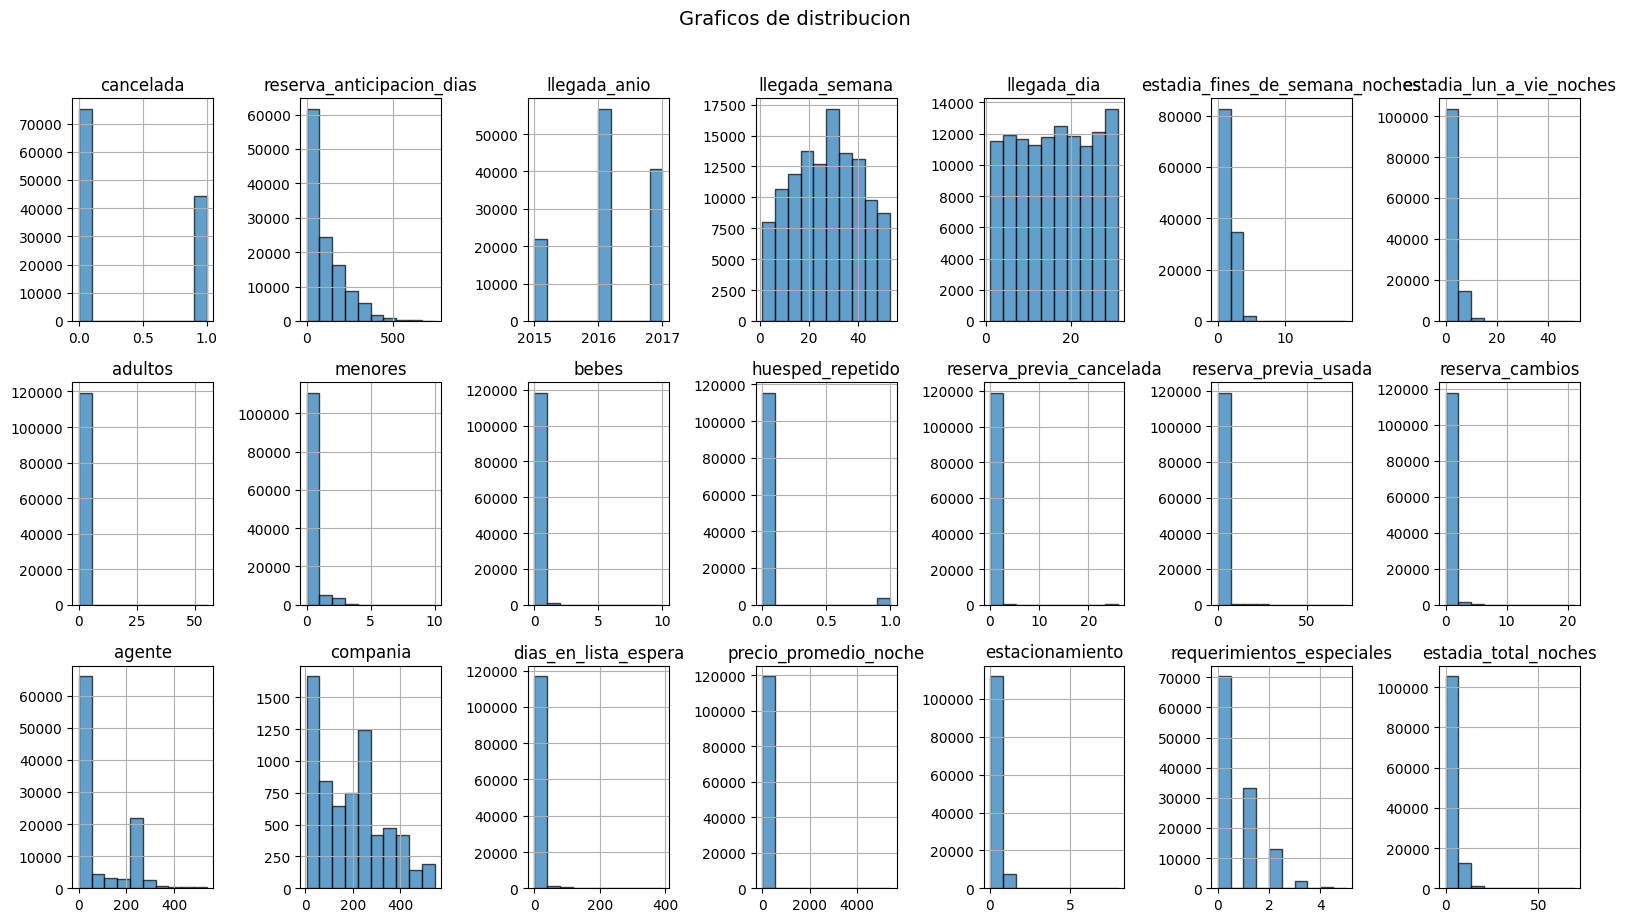

In [44]:
generar_hist(df_imputed)

#Deteccion de outliers para la duracion de la estadia

La mayoría de las estancias son cortas (1-7 noches), pero hay outliers con más de 30 noches. Estos casos pueden ser estancias extendidas de staff o clientes corporativos de larga estadía y deberían analizarse por separado en la estrategia comercial.

In [13]:
original_size = df_imputed.shape[0]
print(f"Tamaño original del dataset: {original_size}")

Tamaño original del dataset: 119390


In [14]:
Q1 =df_imputed['estadia_total_noches'].quantile(0.25)
Q3 = df_imputed['estadia_total_noches'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_imputed_IQR =df_imputed[(df_imputed['estadia_total_noches'] >= lower_bound) & (df_imputed['estadia_total_noches'] <= upper_bound)]
iqr_size = df_imputed_IQR.shape[0]
iqr_removed = original_size - iqr_size

print(f"Con IQR:")
print(f"  Tamaño final: {iqr_size}")
print(f"  Registros eliminados: {iqr_removed} ({100 * iqr_removed/original_size:.2f}%)")

Con IQR:
  Tamaño final: 114133
  Registros eliminados: 5257 (4.40%)


(array([1.05478e+05, 1.25570e+04, 1.12200e+03, 1.47000e+02, 6.60000e+01,
        6.00000e+00, 8.00000e+00, 1.00000e+00, 4.00000e+00, 1.00000e+00]),
 array([ 0. ,  6.9, 13.8, 20.7, 27.6, 34.5, 41.4, 48.3, 55.2, 62.1, 69. ]),
 <BarContainer object of 10 artists>)

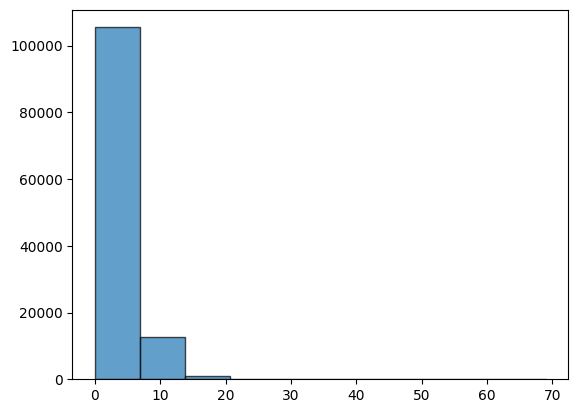

In [39]:
plt.hist(df_imputed['estadia_total_noches'],bins=10, alpha=0.7, edgecolor='black')

(array([1.02553e+05, 1.24950e+04, 1.10700e+03, 1.45000e+02, 6.50000e+01,
        6.00000e+00, 8.00000e+00, 1.00000e+00, 4.00000e+00, 1.00000e+00]),
 array([ 0. ,  6.9, 13.8, 20.7, 27.6, 34.5, 41.4, 48.3, 55.2, 62.1, 69. ]),
 <BarContainer object of 10 artists>)

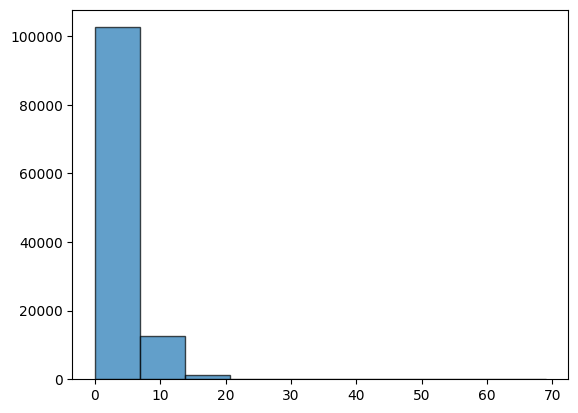

In [40]:
plt.hist(df_imputed_IQR['estadia_total_noches'], bins=10, alpha=0.7, edgecolor='black')

#Deteccion de outliers para la anticipacion de la reserva en dias

Existen muchas reservas hechas con muy poca antelación (pico en los primeros días), pero también valores extremadamente altos (>300 días) que representan casos atípicos. Podrían corresponder a reservas de grupo o eventos especiales, pero conviene revisarlos para evitar distorsionar modelos de predicción.

(array([6.1639e+04, 2.4403e+04, 1.6345e+04, 8.6580e+03, 5.2650e+03,
        1.8250e+03, 8.4400e+02, 2.4700e+02, 1.6200e+02, 2.0000e+00]),
 array([  0. ,  73.7, 147.4, 221.1, 294.8, 368.5, 442.2, 515.9, 589.6,
        663.3, 737. ]),
 <BarContainer object of 10 artists>)

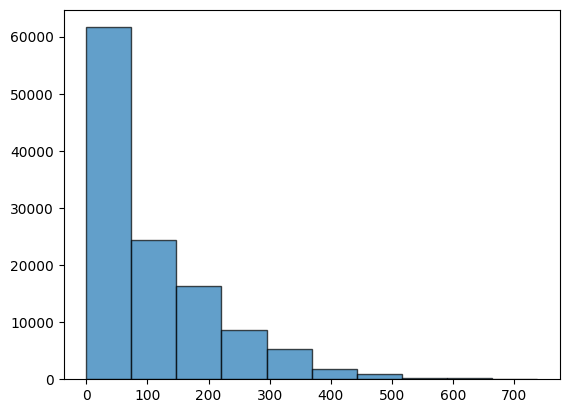

In [41]:
plt.hist(df_imputed['reserva_anticipacion_dias'],bins=10, alpha=0.7, edgecolor='black')

In [18]:
Q1 =df_imputed['reserva_anticipacion_dias'].quantile(0.25)
Q3 = df_imputed['reserva_anticipacion_dias'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_imputed_IQR =df_imputed[(df_imputed['reserva_anticipacion_dias'] >= lower_bound) & (df_imputed['reserva_anticipacion_dias'] <= upper_bound)]
iqr_size = df_imputed_IQR.shape[0]
iqr_removed = original_size - iqr_size

print(f"Con IQR:")
print(f"  Tamaño final: {iqr_size}")
print(f"  Registros eliminados: {iqr_removed} ({100 * iqr_removed/original_size:.2f}%)")

Con IQR:
  Tamaño final: 116385
  Registros eliminados: 3005 (2.52%)


(array([43543., 18615., 13596., 10761.,  9585.,  6577.,  4401.,  4288.,
         3186.,  1833.]),
 array([  0. ,  37.3,  74.6, 111.9, 149.2, 186.5, 223.8, 261.1, 298.4,
        335.7, 373. ]),
 <BarContainer object of 10 artists>)

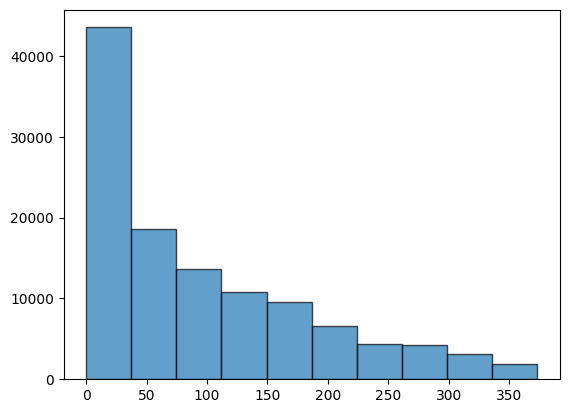

In [42]:
plt.hist(df_imputed_IQR['reserva_anticipacion_dias'],bins=10, alpha=0.7, edgecolor='black')

In [38]:
df_imputed['estadia_total_noches'].describe().round()

,estadia_total_noches
count,119390.0
mean,3.0
std,3.0
min,0.0
25%,2.0
50%,3.0
75%,4.0
max,69.0


In [37]:
df_imputed_IQR['estadia_total_noches'].describe().round()

,estadia_total_noches
count,116385.0
mean,3.0
std,3.0
min,0.0
25%,2.0
50%,3.0
75%,4.0
max,69.0


In [36]:
df_imputed['reserva_anticipacion_dias'].describe().round()

,reserva_anticipacion_dias
count,119390.0
mean,104.0
std,107.0
min,0.0
25%,18.0
50%,69.0
75%,160.0
max,737.0


In [35]:
df_imputed_IQR['reserva_anticipacion_dias'].describe().round()

,reserva_anticipacion_dias
count,116385.0
mean,95.0
std,92.0
min,0.0
25%,17.0
50%,66.0
75%,152.0
max,373.0
